## Job Change into Data Science Domain prediction using Naive Bayes Classifier 
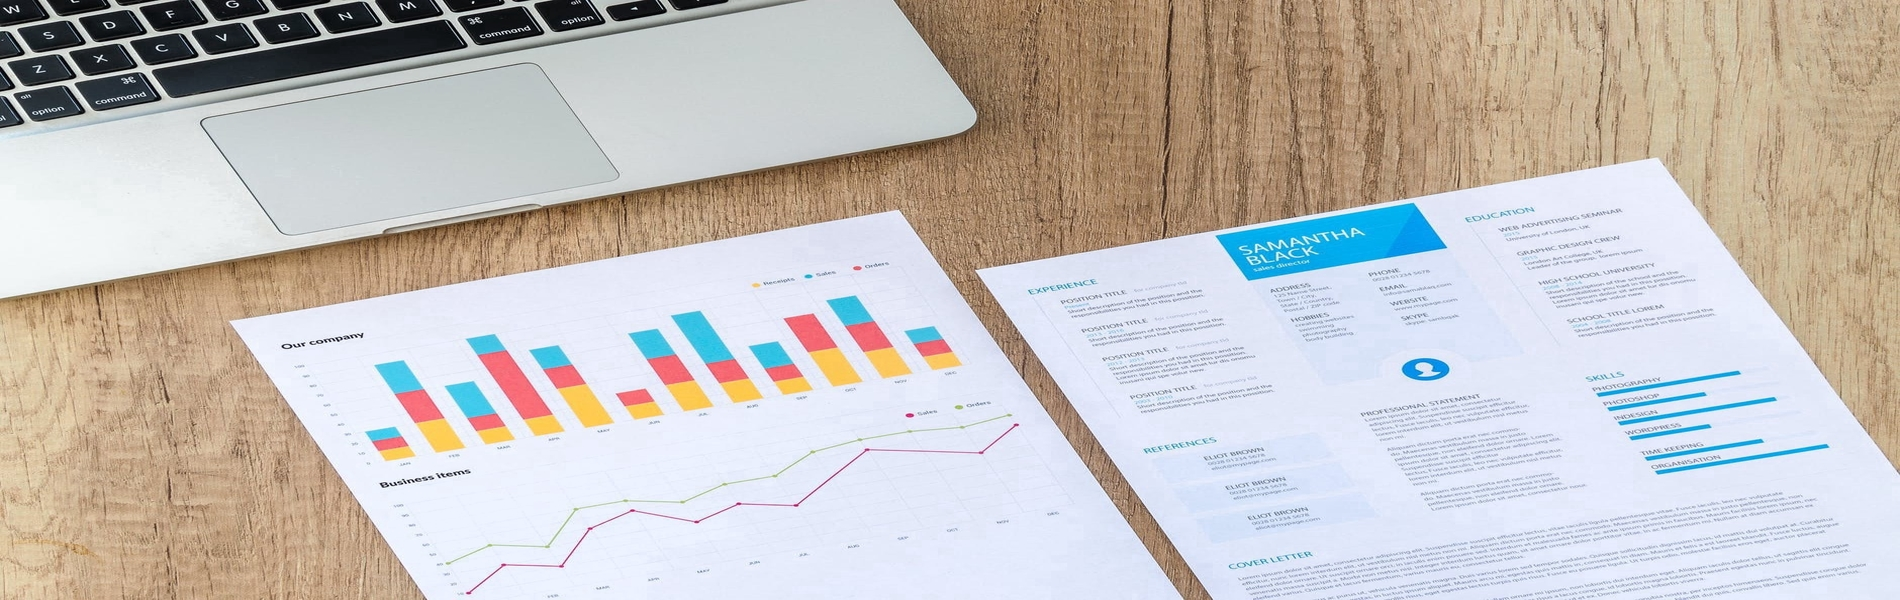

In [124]:
import numpy as np
import pandas as pd
import missingno as m
import plotly.express as px

# Reading Dataset 

In [125]:
df_train = pd.read_csv('aug_train.csv')
df_test = pd.read_csv('aug_test.csv')

In [126]:
df_train.head()

enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2             STEM          5          NaN             NaN        never   
3  Business Degree         <1          NaN         Pvt Ltd        never   
4             STEM        >20        50-99  Funded Startup            4   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
3              52     1.0  
4               8     0.0

In [127]:
df_test.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience company_size company_type last_new_job  \
0             STEM          9          <10          NaN            1   
1             STEM          5          NaN      Pvt Ltd            1   
2              NaN         <1          NaN      Pvt Ltd        never   
3             STEM         11        10/49      Pvt Ltd            1   
4             STEM        >20       10000+      Pvt Ltd           >4   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

In [128]:
df_train.shape

(19158, 14)

In [129]:
df_test.shape

(2129, 13)

In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [131]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [132]:
df_train.describe()

enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000

In [133]:
df_test.describe()

enrollee_id  city_development_index  training_hours
count   2129.000000             2129.000000     2129.000000
mean   16861.614843                0.824984       64.983091
std     9576.846029                0.125074       60.238660
min        3.000000                0.448000        1.000000
25%     8562.000000                0.698000       23.000000
50%    16816.000000                0.903000       47.000000
75%    25129.000000                0.920000       86.000000
max    33353.000000                0.949000      334.000000

# Data Cleaning

<AxesSubplot:>

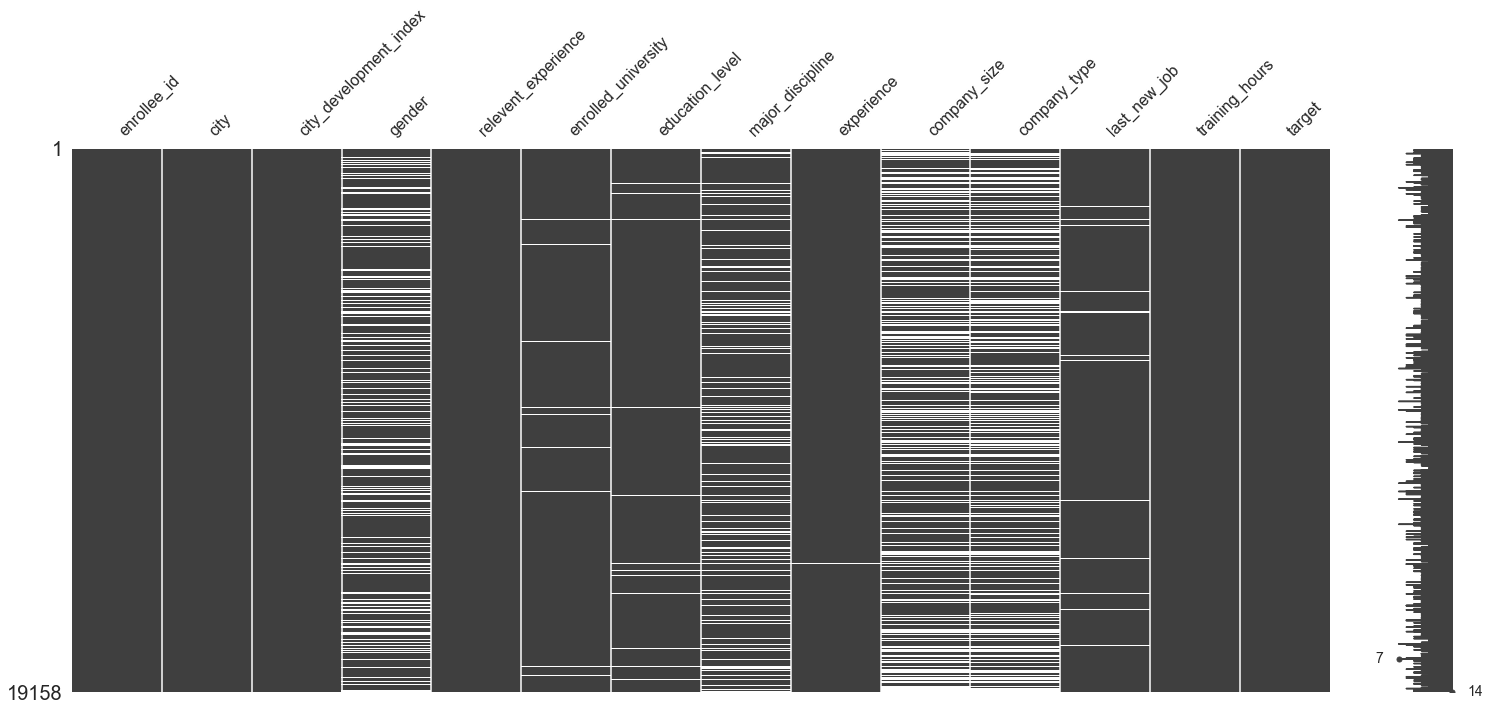

In [134]:
m.matrix(df_train)

<AxesSubplot:>

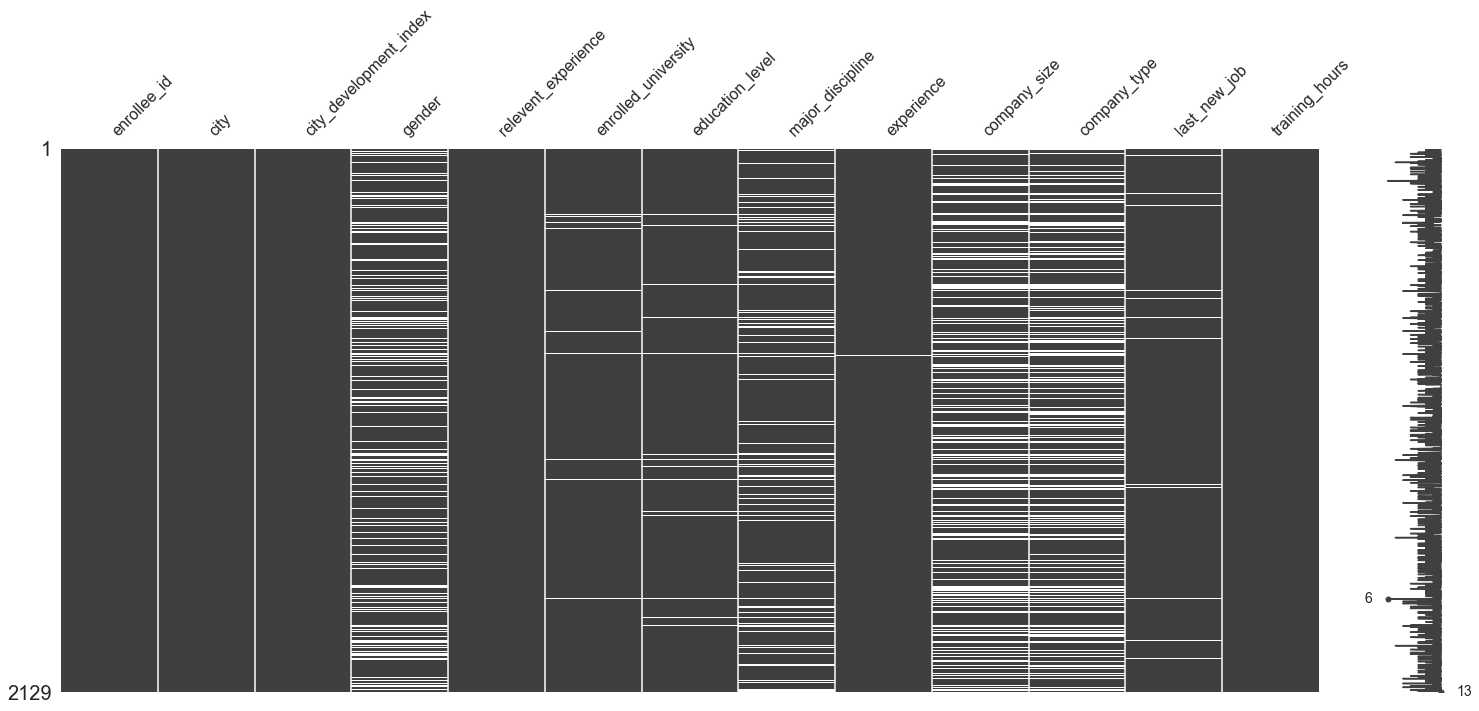

In [135]:
m.matrix(df_test)

In [136]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### Putting 'Not_Specified' in empty columns of gender 

In [137]:
df_train['gender'] = df_train['gender'].fillna('Not_Specified')
df_test['gender'] = df_test['gender'].fillna('Not_Specified')

### Putting 'Other' in empty columns of major_discipline

In [138]:
df_train['major_discipline'] = df_train['major_discipline'].fillna('Other')
df_test['major_discipline'] = df_test['major_discipline'].fillna('Other')

###  Putting 'Not_Specified' in empty columns of company size

In [139]:
df_train['company_size'] = df_train['company_size'].fillna('Not_Specified')
df_test['company_size'] = df_test['company_size'].fillna('Not_Specified')

### Putting 'Other' in empty columns of company type

In [140]:
df_train['company_type'] = df_train['company_type'].fillna('Other')
df_test['company_type'] = df_test['company_type'].fillna('Other')

### Dropping rest of the emply columns data

In [141]:
df_train = df_train.dropna()
df_test = df_test.dropna()

<AxesSubplot:>

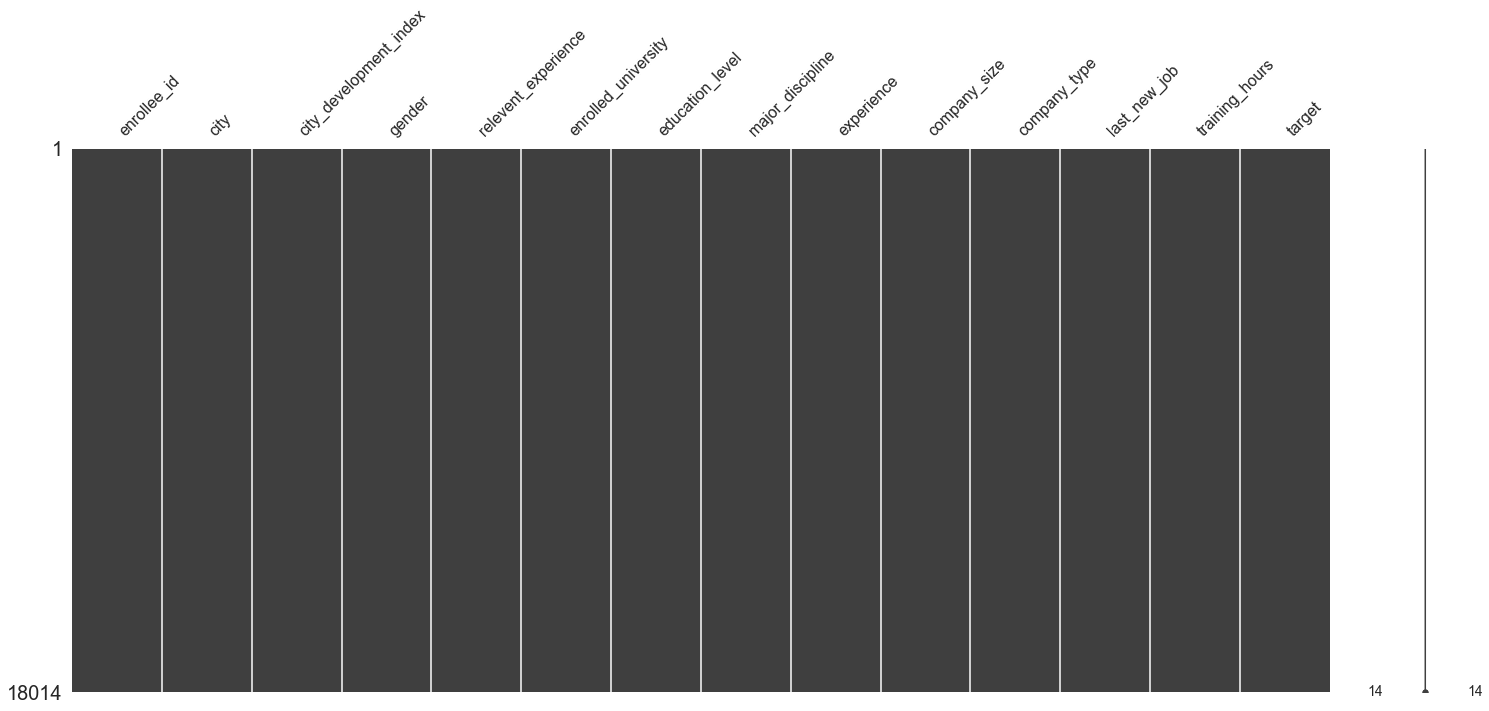

In [142]:
m.matrix(df_train)

<AxesSubplot:>

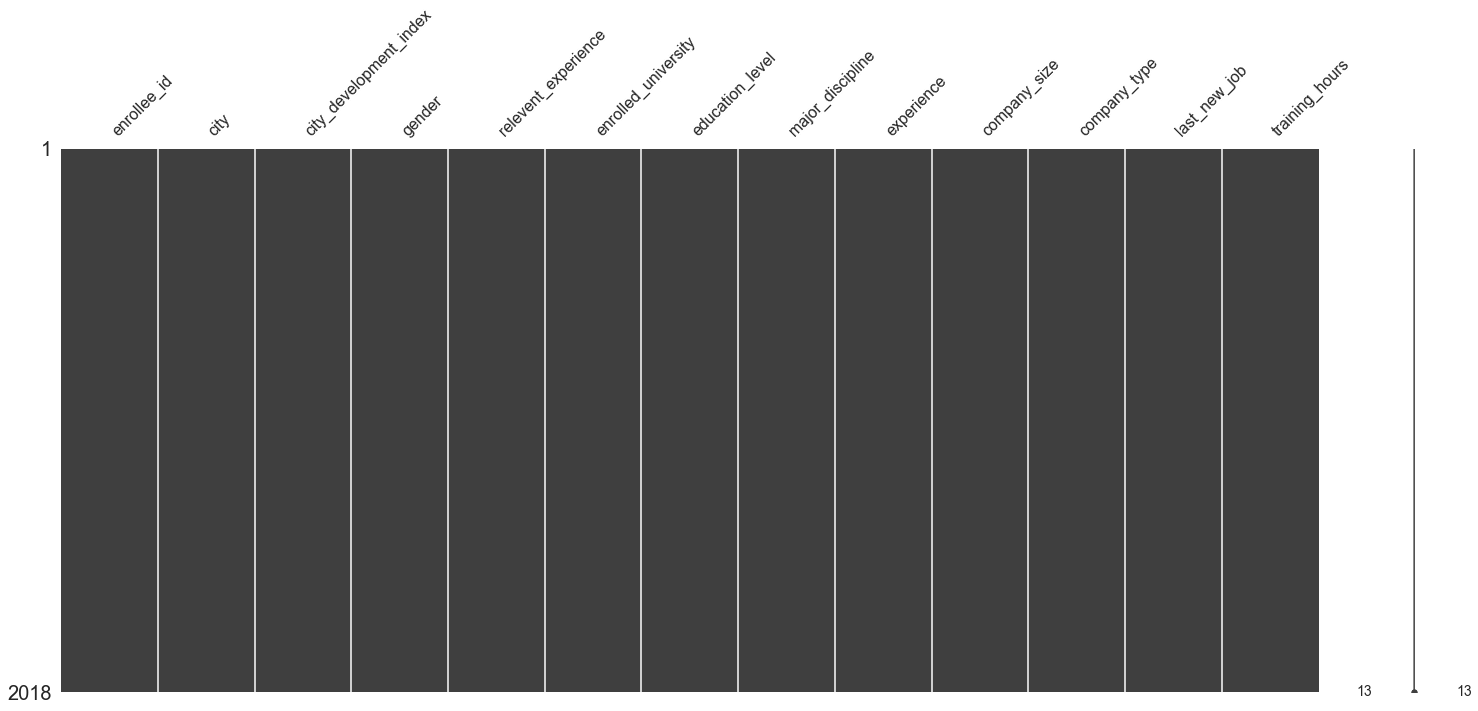

In [143]:
m.matrix(df_test)

# Data Preprocessing

In [144]:
df_train.head()

enrollee_id      city  city_development_index         gender  \
0         8949  city_103                   0.920           Male   
1        29725   city_40                   0.776           Male   
2        11561   city_21                   0.624  Not_Specified   
4          666  city_162                   0.767           Male   
5        21651  city_176                   0.764  Not_Specified   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
4  Has relevent experience       no_enrollment         Masters   
5  Has relevent experience    Part time course        Graduate   

  major_discipline experience   company_size    company_type last_new_job  \
0             STEM        >20  Not_Specified           Other            1   
1             STEM         15          50-99         Pvt Ltd           >4   
2             STEM          5  Not_Specified           Other        never   
4             STEM        >20          50-99  Funded Startup            4   
5             STEM         11  Not_Specified           Other            1   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
4               8     0.0  
5              24     1.0

In [145]:
df_test.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience   company_size company_type last_new_job  \
0             STEM          9            <10        Other            1   
1             STEM          5  Not_Specified      Pvt Ltd            1   
2            Other         <1  Not_Specified      Pvt Ltd        never   
3             STEM         11          10/49      Pvt Ltd            1   
4             STEM        >20         10000+      Pvt Ltd           >4   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

### Removing '<' and '>' from experience column

In [146]:
df_train['experience'] = df_train['experience'].str.replace('<', '').str.replace('>', '').str.strip()
df_test['experience'] = df_test['experience'].str.replace('<', '').str.replace('>', '').str.strip()

### Putting 6 in the place of '>4' in last new job column 

In [147]:
df_train['last_new_job'] = df_train['last_new_job'].str.replace('>4', '6').str.replace('never', '0').str.strip()
df_test['last_new_job'] = df_test['last_new_job'].str.replace('>4', '6').str.replace('never', '0').str.strip()


### Placing the value of company size column in categories

In [148]:
df_train['company_size'] = df_train['company_size'].str.replace('<10', 'Nano').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('10/49', 'Micro').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('50-99', 'Mini').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('100-500', 'Descent').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('500-999', 'Big').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('1000-4999', 'Immense').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('5000-9999', 'Massive').str.strip()
df_train['company_size'] = df_train['company_size'].str.replace('10000+', 'Huge').str.strip()

df_test['company_size'] = df_test['company_size'].str.replace('<10', 'Nano').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('10/49', 'Micro').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('50-99', 'Mini').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('100-500', 'Descent').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('500-999', 'Big').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('1000-4999', 'Immense').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('5000-9999', 'Massive').str.strip()
df_test['company_size'] = df_test['company_size'].str.replace('10000+', 'Huge').str.strip()


In [149]:
df_train.head()

enrollee_id      city  city_development_index         gender  \
0         8949  city_103                   0.920           Male   
1        29725   city_40                   0.776           Male   
2        11561   city_21                   0.624  Not_Specified   
4          666  city_162                   0.767           Male   
5        21651  city_176                   0.764  Not_Specified   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
4  Has relevent experience       no_enrollment         Masters   
5  Has relevent experience    Part time course        Graduate   

  major_discipline experience   company_size    company_type last_new_job  \
0             STEM         20  Not_Specified           Other            1   
1             STEM         15           Mini         Pvt Ltd            6   
2             STEM          5  Not_Specified           Other            0   
4             STEM         20           Mini  Funded Startup            4   
5             STEM         11  Not_Specified           Other            1   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
4               8     0.0  
5              24     1.0

In [150]:
df_test.head()

enrollee_id      city  city_development_index  gender  \
0        32403   city_41                   0.827    Male   
1         9858  city_103                   0.920  Female   
2        31806   city_21                   0.624    Male   
3        27385   city_13                   0.827    Male   
4        27724  city_103                   0.920    Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience    Full time course        Graduate   
1  Has relevent experience       no_enrollment        Graduate   
2   No relevent experience       no_enrollment     High School   
3  Has relevent experience       no_enrollment         Masters   
4  Has relevent experience       no_enrollment        Graduate   

  major_discipline experience   company_size company_type last_new_job  \
0             STEM          9           Nano        Other            1   
1             STEM          5  Not_Specified      Pvt Ltd            1   
2            Other          1  Not_Specified      Pvt Ltd            0   
3             STEM         11          Micro      Pvt Ltd            1   
4             STEM         20          Huge+      Pvt Ltd            6   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

# Univariate, Bivariate and Multivariate Analysis

In [151]:
fig = px.histogram(df_train, x="target")
fig.show()

### For Training set

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

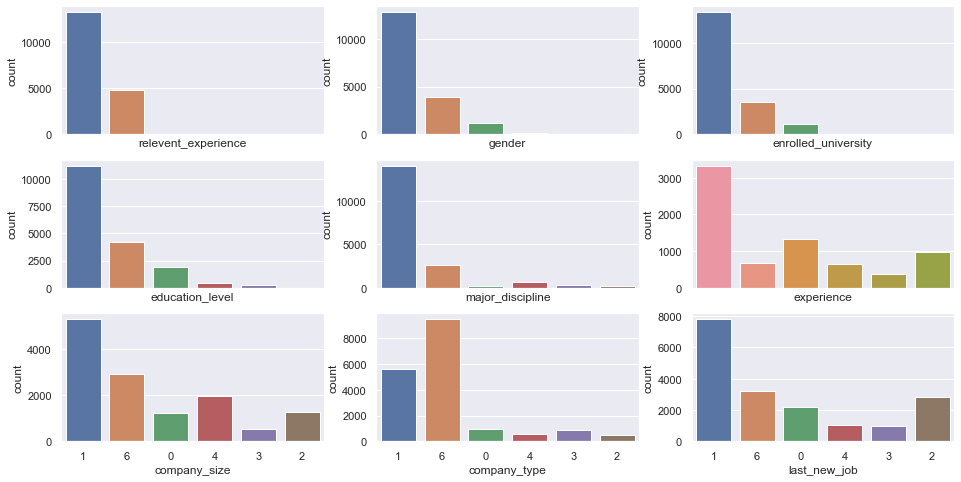

In [152]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x='relevent_experience',data = df_train)
sns.countplot(ax=axes[0,1],x='gender',data = df_train)
sns.countplot(ax=axes[0,2],x='enrolled_university',data = df_train)
sns.countplot(ax=axes[1,0],x='education_level',data = df_train)
sns.countplot(ax=axes[1,1],x='major_discipline',data = df_train)
sns.countplot(ax=axes[1,2],x='experience',data = df_train)
sns.countplot(ax=axes[2,0],x='company_size',data = df_train)
sns.countplot(ax=axes[2,1],x='company_type',data = df_train)
sns.countplot(ax=axes[2,2],x='last_new_job',data = df_train)


### For Prediction Set

<AxesSubplot:xlabel='last_new_job', ylabel='count'>

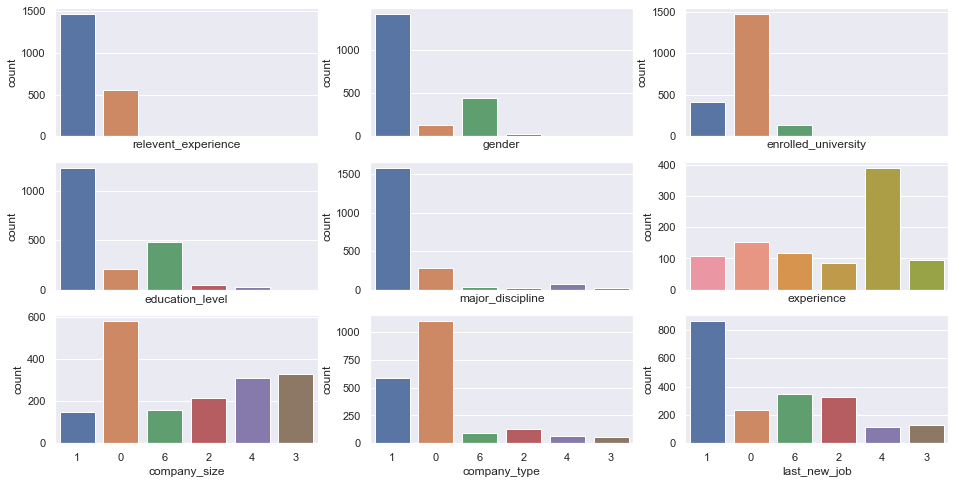

In [153]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
sns.countplot(ax=axes[0,0],x='relevent_experience',data = df_test)
sns.countplot(ax=axes[0,1],x='gender',data = df_test)
sns.countplot(ax=axes[0,2],x='enrolled_university',data = df_test)
sns.countplot(ax=axes[1,0],x='education_level',data = df_test)
sns.countplot(ax=axes[1,1],x='major_discipline',data = df_test)
sns.countplot(ax=axes[1,2],x='experience',data = df_test)
sns.countplot(ax=axes[2,0],x='company_size',data = df_test)
sns.countplot(ax=axes[2,1],x='company_type',data = df_test)
sns.countplot(ax=axes[2,2],x='last_new_job',data = df_test)

In [154]:

fig = px.violin(df_train, x="relevent_experience",y='training_hours',title='Relavent Experience with Training Hours',points='all',box=True)
fig.show()

In [155]:
fig = px.box(df_train, x="experience",y='training_hours',title='Experience and Training Hours with Target',color='target')
fig.show()

In [156]:
df_train

enrollee_id      city  city_development_index         gender  \
0             8949  city_103                   0.920           Male   
1            29725   city_40                   0.776           Male   
2            11561   city_21                   0.624  Not_Specified   
4              666  city_162                   0.767           Male   
5            21651  city_176                   0.764  Not_Specified   
...            ...       ...                     ...            ...   
19153         7386  city_173                   0.878           Male   
19154        31398  city_103                   0.920           Male   
19155        24576  city_103                   0.920           Male   
19156         5756   city_65                   0.802           Male   
19157        23834   city_67                   0.855  Not_Specified   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
4      Has relevent experience       no_enrollment         Masters   
5      Has relevent experience    Part time course        Graduate   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience   company_size    company_type last_new_job  \
0                 STEM         20  Not_Specified           Other            1   
1                 STEM         15           Mini         Pvt Ltd            6   
2                 STEM          5  Not_Specified           Other            0   
4                 STEM         20           Mini  Funded Startup            4   
5                 STEM         11  Not_Specified           Other            1   
...                ...        ...            ...             ...          ...   
19153       Humanities         14  Not_Specified           Other            1   
19154             STEM         14  Not_Specified           Other            4   
19155             STEM         20           Mini         Pvt Ltd            4   
19156            Other          1            Big         Pvt Ltd            2   
19157            Other          2  Not_Specified           Other            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
4                   8     0.0  
5                  24     1.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[18014 rows x 14 columns]

In [157]:
fig = px.histogram(df_train, x="gender",y='city_development_index',title='Target with Gender and City Development ',color='target')
fig.show()

In [158]:
fig = px.scatter(df_train, x="major_discipline",y='city_development_index',title='Target with Major discipline and City Development ',color='target')
fig.show()

In [159]:
fig = px.box(y=df_train['relevent_experience'], x= df_train['major_discipline'],color=df_train['target'],
            title='Experience in Major Subject')
fig.update_xaxes(type='category')
fig.show()

# Dropping Useless Column

In [160]:
df_train = df_train.drop(columns=['enrollee_id','city','city_development_index'])
df_test = df_test.drop(columns=['enrollee_id','city','city_development_index'])

In [161]:
df_train.columns

Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'training_hours', 'target'],
      dtype='object')

# Using Label Encoder for Categorical Variable 

In [162]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['gender'] = le.fit_transform(df_train['gender'])
df_train['relevent_experience'] = le.fit_transform(df_train['relevent_experience'])
df_train['enrolled_university'] = le.fit_transform(df_train['enrolled_university'])
df_train['education_level'] = le.fit_transform(df_train['education_level'])
df_train['major_discipline'] = le.fit_transform(df_train['major_discipline'])
df_train['company_size'] = le.fit_transform(df_train['company_size'])
df_train['company_type'] = le.fit_transform(df_train['company_type'])

df_test['gender'] = le.fit_transform(df_test['gender'])
df_test['relevent_experience'] = le.fit_transform(df_test['relevent_experience'])
df_test['enrolled_university'] = le.fit_transform(df_test['enrolled_university'])
df_test['education_level'] = le.fit_transform(df_test['education_level'])
df_test['major_discipline'] = le.fit_transform(df_test['major_discipline'])
df_test['company_size'] = le.fit_transform(df_test['company_size'])
df_test['company_type'] = le.fit_transform(df_test['company_type'])

# Heatmap

### For Training Data 

<AxesSubplot:>

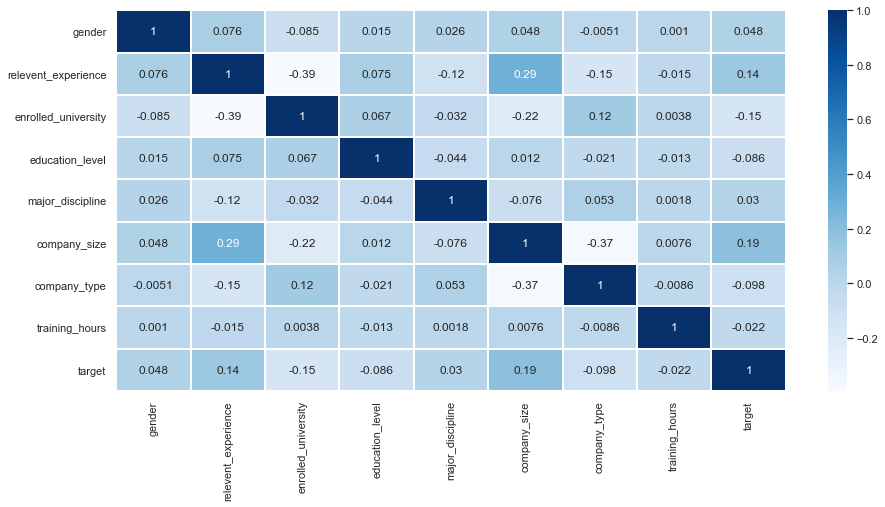

In [163]:
plt.subplots(figsize=(15,7))
sns.heatmap(df_train.corr(),annot=True,linewidth=1,cmap='Blues')

### For Test Data 

<AxesSubplot:>

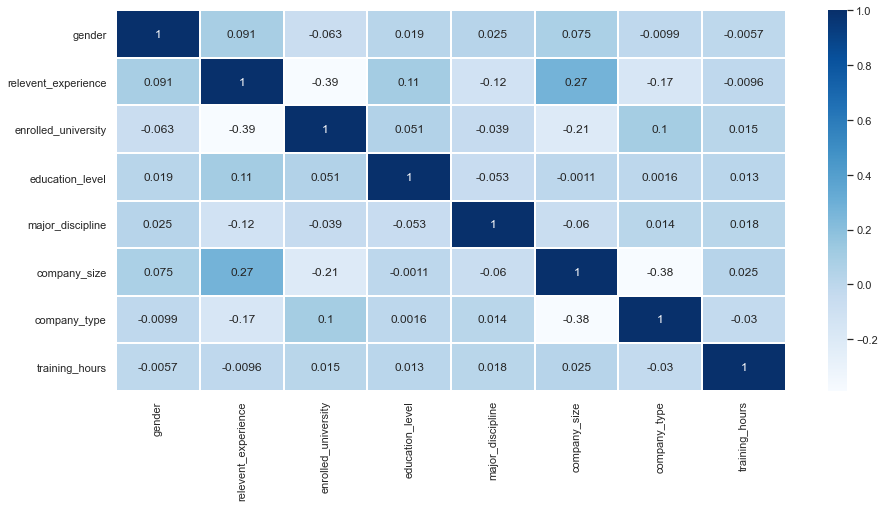

In [164]:
plt.subplots(figsize=(15,7))
sns.heatmap(df_test.corr(),annot=True,linewidth=1,cmap='Blues')

In [165]:
df_train.head()

gender  relevent_experience  enrolled_university  education_level  \
0       1                    0                    2                0   
1       1                    1                    2                0   
2       2                    1                    0                0   
4       1                    0                    2                2   
5       2                    0                    1                0   

   major_discipline experience  company_size  company_type last_new_job  \
0                 5         20             8             3            1   
1                 5         15             6             5            6   
2                 5          5             8             3            0   
4                 5         20             6             1            4   
5                 5         11             8             3            1   

   training_hours  target  
0              36     1.0  
1              47     0.0  
2              83     0.0  
4               8     0.0  
5              24     1.0

In [166]:
df_test.head()

gender  relevent_experience  enrolled_university  education_level  \
0       1                    0                    0                0   
1       0                    0                    2                0   
2       1                    1                    2                1   
3       1                    0                    2                2   
4       1                    0                    2                0   

   major_discipline experience  company_size  company_type last_new_job  \
0                 5          9             7             3            1   
1                 5          5             8             5            1   
2                 4          1             8             5            0   
3                 5         11             5             5            1   
4                 5         20             2             5            6   

   training_hours  
0              21  
1              98  
2              15  
3              39  
4              72

In [167]:
df = df_train

# X and y Split

In [168]:
y=df.pop('target')
X=df

In [169]:
X

gender  relevent_experience  enrolled_university  education_level  \
0           1                    0                    2                0   
1           1                    1                    2                0   
2           2                    1                    0                0   
4           1                    0                    2                2   
5           2                    0                    1                0   
...       ...                  ...                  ...              ...   
19153       1                    1                    2                0   
19154       1                    0                    2                0   
19155       1                    0                    2                0   
19156       1                    0                    2                1   
19157       2                    1                    2                4   

       major_discipline experience  company_size  company_type last_new_job  \
0                     5         20             8             3            1   
1                     5         15             6             5            6   
2                     5          5             8             3            0   
4                     5         20             6             1            4   
5                     5         11             8             3            1   
...                 ...        ...           ...           ...          ...   
19153                 2         14             8             3            1   
19154                 5         14             8             3            4   
19155                 5         20             6             5            4   
19156                 4          1             0             5            2   
19157                 4          2             8             3            1   

       training_hours  
0                  36  
1                  47  
2                  83  
4                   8  
5                  24  
...               ...  
19153              42  
19154              52  
19155              44  
19156              97  
19157             127  

[18014 rows x 10 columns]

In [170]:
y

0        1.0
1        0.0
2        0.0
4        0.0
5        1.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 18014, dtype: float64

# Train Test Split 

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [172]:
y=y.values
y = y.reshape(len(y),1)

# Feature Scaling

In [173]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes Classifier

In [174]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [175]:
y_test=y_test.values

# Prediction

In [176]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 1.]
 [0. 0.]]


# Confusion Matrix

In [177]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[2878  526]
 [ 707  393]]


<AxesSubplot:>

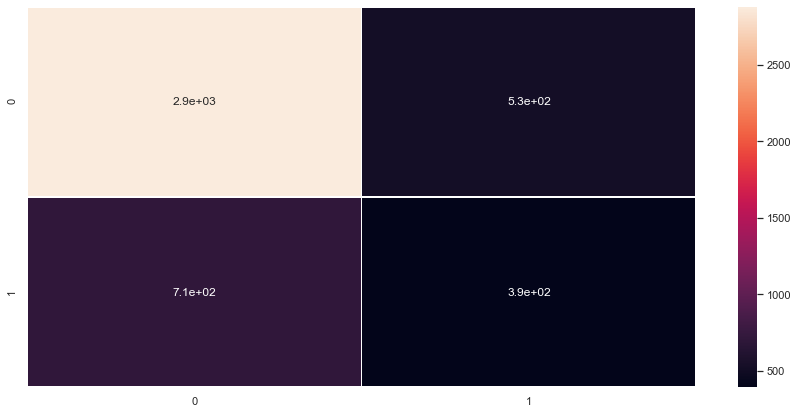

In [178]:
plt.subplots(figsize=(15,7))
sns.heatmap(cm,annot=True,linewidth=1)

# Accuracy

In [179]:
print("Accuracy Score : ",accuracy_score(y_test, y_pred))

Accuracy Score :  0.7262433392539964


In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      3404
         1.0       0.43      0.36      0.39      1100

    accuracy                           0.73      4504
   macro avg       0.62      0.60      0.61      4504
weighted avg       0.71      0.73      0.72      4504



# Prediction for Given Test Dataset

In [180]:
new_pred = classifier.predict(df_test)
print(new_pred)

[0. 0. 0. ... 0. 0. 0.]


In [181]:
new_pred = new_pred.reshape(len(new_pred),1)

In [182]:
new_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [184]:
df_test

gender  relevent_experience  enrolled_university  education_level  \
0          1                    0                    0                0   
1          0                    0                    2                0   
2          1                    1                    2                1   
3          1                    0                    2                2   
4          1                    0                    2                0   
...      ...                  ...                  ...              ...   
2124       1                    1                    2                0   
2125       1                    0                    2                2   
2126       1                    1                    2                4   
2127       1                    0                    0                1   
2128       1                    0                    2                2   

      major_discipline experience  company_size  company_type last_new_job  \
0                    5          9             7             3            1   
1                    5          5             8             5            1   
2                    4          1             8             5            0   
3                    5         11             5             5            1   
4                    5         20             2             5            6   
...                ...        ...           ...           ...          ...   
2124                 2         16             8             4            4   
2125                 5         18             8             3            2   
2126                 4          3             8             5            0   
2127                 4          7             1             4            1   
2128                 5         15             2             5            2   

      training_hours  
0                 21  
1                 98  
2                 15  
3                 39  
4                 72  
...              ...  
2124              15  
2125              30  
2126              18  
2127              84  
2128              11  

[2018 rows x 10 columns]

In [185]:
dataset = pd.DataFrame({'Data_Scientist Prediction': new_pred[:, 0]})
dataset.to_csv('dataset.csv')
dataset

Data_Scientist Prediction
0                           0.0
1                           0.0
2                           0.0
3                           0.0
4                           0.0
...                         ...
2013                        0.0
2014                        0.0
2015                        0.0
2016                        0.0
2017                        0.0

[2018 rows x 1 columns]

# This Model can Predict Whether a Person will get Data Science Job or not with an Accuracy of 72%